## Day 2

https://adventofcode.com/2022/day/2

In [1]:
def parse02(filename):
    with open(filename) as f:
        data = [ l.strip().split(" ") for l in f.readlines() ]
        return data

In [2]:
V = {"A":1, "B":2, "C":3, "X":1, "Y":2, "Z":3} # shape values

from functools import cache 

@cache # there is only a limited set of combinations of shapes and the corresponsing score, no need to recompute
def round(a,b):
    d = V[b]-V[a]
    if abs(d)<2:
        return d
    else:
        return -d

@cache
def score(a,b):
    r = round(a,b)
    if r>0:
        return V[b]+6 # win
    elif r==0:
        return V[b]+3 # draw
    else:
        return V[b]   # loose

def part1(data):
    return sum([score(a,b) for a,b in data])

W = {"A":"Y", "B":"Z", "C":"X" } # play to win
L = {"A":"Z", "B":"X", "C":"Y" } # play to loose
D = {"A":"X", "B":"Y", "C":"Z" } # play to draw
R = {"X":L, "Y":D, "Z":W} # reply according to strategy

def part2(data):
    return sum([score(a,R[x][a]) for a,x in data])

In [3]:
test = parse02("examples/example02.txt")
data = parse02("AOC2022inputs/input02.txt")

print("Test 1:",part1(test))
print("Part 1:",part1(data))
print("Test 2:",part2(test))
print("Part 2:",part2(data))

Test 1: 15
Part 1: 8392
Test 2: 12
Part 2: 10116


### Score evolution

Strategy is not really helping...

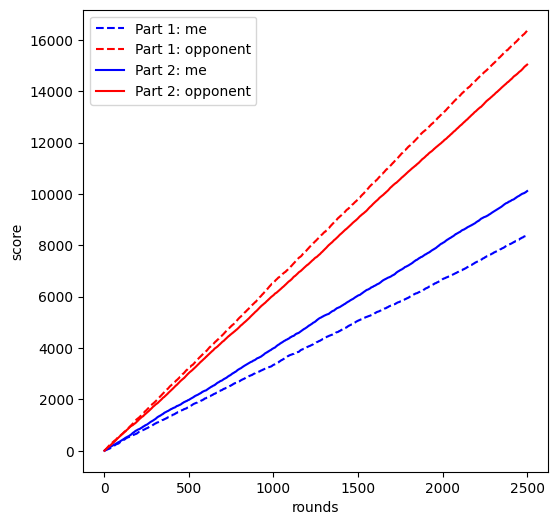

In [4]:
import matplotlib.pyplot as plt

data = parse02("AOC2022inputs/input02.txt")

score1b = [ score(a,b) for a,b in data ]
score1a = [ score(b,a) for a,b in data ]
score2b = [score(a,R[x][a]) for a,x in data]
score2a = [score(R[x][a],a) for a,x in data]

t = range(1,len(score1b)+1)
score1a_tot = [ sum(score1a[:i]) for i in range(len(score1a)) ]
score1b_tot = [ sum(score1b[:i]) for i in range(len(score1b)) ]
score2a_tot = [ sum(score2a[:i]) for i in range(len(score2a)) ]
score2b_tot = [ sum(score2b[:i]) for i in range(len(score2b)) ]

fig = plt.figure(1,(6,6))

ax = plt.subplot(1,1,1)
plt.plot(t,score1b_tot,label="Part 1: me"      ,c="blue",linestyle="--")
plt.plot(t,score1a_tot,label="Part 1: opponent",c="red" ,linestyle="--")
plt.plot(t,score2b_tot,label="Part 2: me"      ,c="blue",linestyle="-")
plt.plot(t,score2a_tot,label="Part 2: opponent",c="red" ,linestyle="-")

plt.xlabel('rounds')
plt.ylabel('score')
ax.legend()